# Perbandingan Algoritma KNN, Naive Bayes dan DTree Pada Klasifikasi Jenis IPM

### Ujian Praktek Data Science

Nama : Nadea Putri Nur Fauzi

Kelas : Ular

Program : AI Mastery 

Company : Orbit Future Academy

Dataset : lpm.csv (Sumber : Orbit Future Academy) - Data Skunder

Algoritma Project : KNN, Naive Bayes & Decision Tree

Sumber : 

https://www.statmat.net/indeks-pembangunan-manusia-ipm/ 

Dataset : https://ptorbitventurainodnesia-my.sharepoint.com/:x:/g/personal/admin_content_orbitfutureacademy_sch_id/ERZwvIbz2LBDnw1uSbE1wIABWOw6kf9yzGlvBQYyvzYO6Q?rtime=Wac08POT2kg

### Step 1 ( Problem Scooping)

Indeks Pembangunan Manusia (IPM) menggambarkan 3 dimensi kehidupan manusia yaitu peluang hidup (longevity), pengetahuan (knowledge), dan standar hidup layak (decent living standard).

Indeks Pembangunan Manusia (IPM) biasa disebut indeks komposit. Indeks komposit merupakan sebuah indeks yang disusun oleh indeks-indeks lain seperti indeks pendidikan, indeks harapan hidup dan indeks pendapatan.

Di Indonesia, IPM ini dianalisis oleh Badan Pusat Statistika (BPS) dan dari data IPM ini pemerintah bisa mengambil keputusan dan kebijakan untuk pembangunan yang lebih baik kedepannya.

Indeks Pembangunan Manusia (IPM) bisa dipengaruhi oleh beberapa faktor seperti:

- Harapan lama sekolah

- Pengeluaran perkapita

- Rerata lama sekolah

- Usia harapan hidup

Dari 4 faktor tersebut, kita dapat mengelompokkan ke beberapa jenis IPM yaitu Very High, High, Normal dan Low.

Project ini akan mengklasifikasikan dataset menggunakan Algoritma Machine Learning yaitu K-Neirest Neighbors, Decision Tree Classifier dan Naive Bayes Classifier. Setelah pemodelan maka akan dilakukan prediksi terhadap data baru, sehingga model akan otomatis memprediksi jenis kelas IPM data yang diinputkan.

Rumusan Masalah:

H0 : Jenis IPM tidak dipengaruhi oleh harapan lama sekolah, pengeluaran perkapita, rerata lama sekolah dan usia harapan hidup.

H1 : Jenis IPM dipengaruhi oleh harapan lama sekolah, pengeluaran perkapita, rerata lama sekolah dan usia harapan hidup.

### Step 2 (Data Acquisition)

Data yang digunakan pada project ini adalah data IPM yang disediakan oleh Orbit Future Academy. Data berformat csv.

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Open Dataset
data = pd.read_csv('ipm.csv')
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


### Step 3 (Data Exploration)

Pada tahap ini akan dilakukan Exploratory Data Analysis (EDA), pencarian informasi-informasi penting dan membuat dataset siap dan layak untuk dilakukan pemodelan Machine Learning.

In [3]:
#Melihat ukuran data
data.shape

(2196, 5)

In [4]:
#Melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [5]:
#Melihat Jumlah Nilai Null dalam data
data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [6]:
#Melihat deskriptif statistik dataset
data.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


Kolom IPM

In [8]:
#Melihat jumlah data dalam kolom IPM
data['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

Korelasi Data

C:\Users\HP\AppData\Local\Temp\ipykernel_13596\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

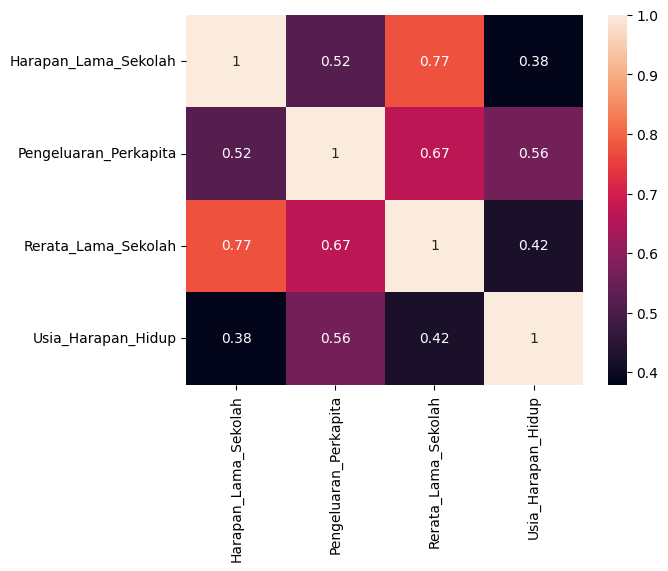

In [9]:
sns.heatmap(data.corr(),annot=True)

Declire Dataset

In [10]:
x = data.drop(['IPM'],axis=True)
y = data['IPM']

In [11]:
x.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22


In [12]:
y.head()

0      High
1    Normal
2    Normal
3    Normal
4    Normal
Name: IPM, dtype: object

Split Dataset (Training & Testing)

In [13]:
from sklearn.model_selection import train_test_split

#Menggunakan perbandingan 75%:25% dan random state=0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [14]:
#Melihat ukuran x_train dan x_test
x_train.shape, x_test.shape

((1647, 4), (549, 4))

### Step 4 (Modelling)

KNN Algorithm

In [15]:
#Import library KNN dan CF
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [16]:
knn = KNeighborsClassifier() #auto 5
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [17]:
#Akutasi model
score = metrics.accuracy_score(y_test, y_pred)
print('Akurasi = ',score)

Akurasi =  0.7868852459016393


In [18]:
#Hasil Akurasi Training dan Testing
print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(x_test, y_test)))

Training set score: 0.8506
Test set score: 0.7869


In [19]:
#Classification Report model
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_pred) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.73      0.75      0.74       208
         Low       1.00      0.67      0.80        24
      Normal       0.82      0.82      0.82       276
   Very-High       0.77      0.83      0.80        41

    accuracy                           0.79       549
   macro avg       0.83      0.77      0.79       549
weighted avg       0.79      0.79      0.79       549



Decision Tree Algoirithm

In [20]:
#Melihat nilai max-depth yang paling optimal
from sklearn.tree import DecisionTreeClassifier
for max_d in range(1,10):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(x_train, y_train)
  print('Hasil Training model untuk max_depth {} adalah :'.format(max_d), model.score(x_train,y_train))
  print('Hasil Testing model untuk max_depth {} adalah :'.format(max_d), model.score(x_test,y_test))
  print('')

Hasil Training model untuk max_depth 1 adalah : 0.7413479052823315
Hasil Testing model untuk max_depth 1 adalah : 0.7285974499089253

Hasil Training model untuk max_depth 2 adalah : 0.8142076502732241
Hasil Testing model untuk max_depth 2 adalah : 0.8014571948998178

Hasil Training model untuk max_depth 3 adalah : 0.8482088646023073
Hasil Testing model untuk max_depth 3 adalah : 0.825136612021858

Hasil Training model untuk max_depth 4 adalah : 0.9040680024286581
Hasil Testing model untuk max_depth 4 adalah : 0.8652094717668488

Hasil Training model untuk max_depth 5 adalah : 0.9247115968427444
Hasil Testing model untuk max_depth 5 adalah : 0.9016393442622951

Hasil Training model untuk max_depth 6 adalah : 0.9562841530054644
Hasil Testing model untuk max_depth 6 adalah : 0.907103825136612

Hasil Training model untuk max_depth 7 adalah : 0.9684274438372799
Hasil Testing model untuk max_depth 7 adalah : 0.9344262295081968

Hasil Training model untuk max_depth 8 adalah : 0.97814207650273

In [21]:
#pemodelan DTREE
from sklearn.tree import DecisionTreeClassifier

modelGini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
modelGini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [22]:
y_pred_gini = modelGini.predict(x_test)

In [23]:
#Confusion Matrix model DTREE
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)
accuracy_score(y_test, y_pred_gini)

[[166   0  34   8]
 [  0  22   2   0]
 [  7   0 269   0]
 [  3   0   0  38]]


0.9016393442622951

In [24]:
#Hasil Akurasi Training dan Testing
print('Training set score: {:.4f}'.format(modelGini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelGini.score(x_test, y_test)))

Training set score: 0.9247
Test set score: 0.9016


In [25]:
#Classification Report model DTREE
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

        High       0.94      0.80      0.86       208
         Low       1.00      0.92      0.96        24
      Normal       0.88      0.97      0.93       276
   Very-High       0.83      0.93      0.87        41

    accuracy                           0.90       549
   macro avg       0.91      0.90      0.91       549
weighted avg       0.91      0.90      0.90       549



Naive Bayes Algorithm

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
#Pemodelan Naive Bayes
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred) 

array([[144,   0,  54,  10],
       [  0,  18,   6,   0],
       [ 69,   9, 198,   0],
       [ 14,   0,   0,  27]], dtype=int64)

In [28]:
#Hasil Akurasi Training dan Testing
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 0.7335
Test set score: 0.7049


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.63      0.69      0.66       208
         Low       0.67      0.75      0.71        24
      Normal       0.77      0.72      0.74       276
   Very-High       0.73      0.66      0.69        41

    accuracy                           0.70       549
   macro avg       0.70      0.70      0.70       549
weighted avg       0.71      0.70      0.71       549



### Step 5 (Evaluation)

Evaluasi model dilihat dari nilai Akurasi Training dan Testing, Confusion Matrix dan Classification Report

### K-Nearest Neighbors

Akurasi Training : 85.06%

Akurasi Testing : 78.69%

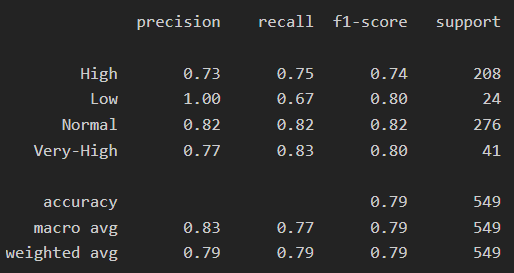

### Decision Tree

Akurasi Training : 92.47%

Akurasi Testing : 90.16%

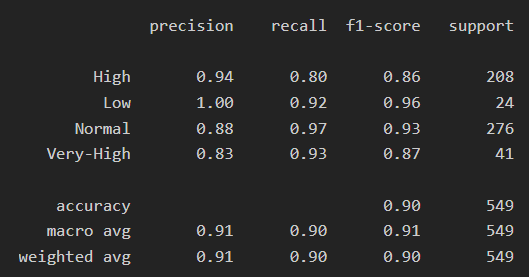

### Naive Bayes Classifier

Akurasi Training : 73.35%

Akurasi Testing : 70.49%

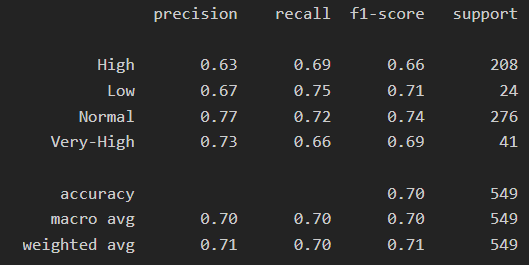

Jadi model terbaik pada kasus ini adalah Decision Tree dengan kriteria gini dan maksimal kedalaman pohon = 5. 

### Step 6 (Predict)

In [30]:
predict = modelGini.predict(np.array([[14.56,8765,8.34,64.34]]))
predict

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

### Kesimpulan

H0 ditolak / H1 diterima yang artinya Jenis IPM dipengaruhi oleh harapan lama sekolah, pengeluaran perkapita, rerata lama sekolah dan usia harapan hidup.

Dari 4 faktor tersebut, model akan mengklasifikasikan data ke 4 jenis IPM. 

Dengan model Decision Tree ini juga, model dapat melakukan prediksi terhadap dataset baru dengan nilai akurasi sebesar 90.16%. 

Model Decision Tree juga tidak dikatakan overfitting dikarenakan perbedaan akurasi training dan testing tidak berbeda jauh.

In [31]:
#Save model
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(modelGini, pickle_out)
pickle_out.close()